In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import plot_tree
import seaborn as sns
import xlwt
from xlwt import Workbook
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
import csv
from sklearn.feature_extraction.text import CountVectorizer

In [126]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [127]:
df  = pd.read_csv("dataset/train.csv")
df.head()
dataset = df.values

In [128]:
print(dataset)

[[1 nan nan
  'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
  1]
 [4 nan nan 'Forest fire near La Ronge Sask. Canada' 1]
 [5 nan nan
  "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
  1]
 ...
 [10871 nan nan
  'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ' 1]
 [10872 nan nan
  'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.'
  1]
 [10873 nan nan
  'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'
  1]]


In [129]:
X = dataset[:,3:4]
y = dataset[:,4:5]

In [130]:
print(X.shape)

(7613, 1)


In [131]:
print(y.shape)

(7613, 1)


In [132]:
type(X)
corpus = []
for i in X:
    for j in i:
        corpus.append(j)


In [133]:
print(corpus[0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [134]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [135]:
X = X.toarray()

In [136]:
print(X[0])

[0 0 0 ... 0 0 0]


In [137]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [138]:
type(X_scale.shape)

tuple

In [139]:
type(y.shape)

tuple

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=101)

In [151]:
model = Sequential([Dense(128, activation='relu', input_shape=X_train.shape[1:]),    
                    Dense(64, activation='relu'),
                    Dropout(.5),
                    Dense(32, activation='relu'),
                    Dense(1, activation='sigmoid'),])



model.compile(optimizer='sgd',              
              loss='binary_crossentropy',             
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=5,
          epochs=4,
          validation_data=(X_test,y_test))

Train on 5329 samples, validate on 2284 samples
Epoch 1/4
5329/5329 [==============================] - 13s 3ms/sample - loss: 0.6833 - acc: 0.5654 - val_loss: 0.6740 - val_acc: 0.5823
Epoch 2/4
5329/5329 [==============================] - 13s 3ms/sample - loss: 0.6603 - acc: 0.5971 - val_loss: 0.6248 - val_acc: 0.6861
Epoch 3/4
5329/5329 [==============================] - 13s 3ms/sample - loss: 0.5733 - acc: 0.7429 - val_loss: 0.5129 - val_acc: 0.7842
Epoch 4/4
5329/5329 [==============================] - 14s 3ms/sample - loss: 0.4232 - acc: 0.8332 - val_loss: 0.4693 - val_acc: 0.7907


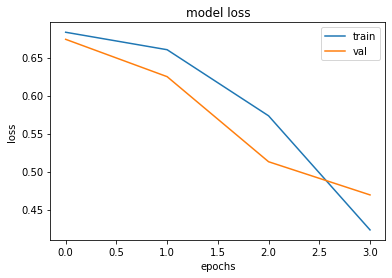

In [152]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train","val"],loc="upper right")
plt.show()

In [153]:
test  = pd.read_csv("dataset/test.csv")
test = test.values

In [155]:
test = test[:,3:4]

In [157]:
corpus1 = []
for i in test:
    for j in i:
        corpus1.append(j)

In [159]:
test = vectorizer.transform(corpus1)

In [162]:
test = test.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [163]:
test_scale = min_max_scaler.fit_transform(test)

In [166]:
ans = model.predict(test_scale)

In [168]:
arr=[]
for i in ans:
    if(i<=0.5):
        arr.append(0)
    else:
        arr.append(1)

In [173]:
print(len(arr))
print(arr)

3263
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [171]:
count = 1

In [172]:
with open('dataset/sample_submission.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL,lineterminator = '\n')
    wr.writerow(["id","target"])
    for word in arr:
        wr.writerow([count,word])
        count+=1